In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data preparation

In [5]:
df = pd.read_csv('../data/1900_2021_DISASTERS.xlsx - emdat data.csv')
df.head()

,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,Country,...,No Affected,No Homeless,Total Affected,Insured Damages ('000 US$),Total Damages ('000 US$),CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
0,1900,9002,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,Cabo Verde,...,NaN,NaN,NaN,NaN,NaN,3.221647,NaN,NaN,NaN,NaN
1,1900,9001,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,India,...,NaN,NaN,NaN,NaN,NaN,3.221647,NaN,NaN,NaN,NaN
2,1902,12,NaN,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,Guatemala,...,NaN,NaN,NaN,NaN,25000.0,3.350513,NaN,NaN,NaN,NaN
3,1902,3,NaN,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Santa Maria,Guatemala,...,NaN,NaN,NaN,NaN,NaN,3.350513,NaN,NaN,NaN,NaN
4,1902,10,NaN,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Santa Maria,Guatemala,...,NaN,NaN,NaN,NaN,NaN,3.350513,NaN,NaN,NaN,NaN


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16126 entries, 0 to 16125
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        16126 non-null  int64  
 1   Seq                         16126 non-null  int64  
 2   Glide                       1581 non-null   object 
 3   Disaster Group              16126 non-null  object 
 4   Disaster Subgroup           16126 non-null  object 
 5   Disaster Type               16126 non-null  object 
 6   Disaster Subtype            13016 non-null  object 
 7   Disaster Subsubtype         1077 non-null   object 
 8   Event Name                  3861 non-null   object 
 9   Country                     16126 non-null  object 
 10  ISO                         16126 non-null  object 
 11  Region                      16126 non-null  object 
 12  Continent                   16126 non-null  object 
 13  Location                    143

In [7]:
df[df['Start Year'] != df['End Year']][['Year', 'Disaster Type','Start Year', 'End Year', 'Origin']].sort_values(by=['Year', 'Disaster Type','Start Year', 'End Year', 'Origin'])




,Year,Disaster Type,Start Year,End Year,Origin
864,1906,Drought,1906,1907,NaN
24,1910,Drought,1910,1914,NaN
27,1910,Drought,1910,1914,NaN
30,1910,Drought,1910,1914,NaN
31,1910,Drought,1910,1914,NaN
...,...,...,...,...,...
15061,2019,Insect infestation,2019,2020,NaN
15471,2019,Insect infestation,2019,2020,NaN
15026,2019,Wildfire,2019,2020,High temperatures and dry conditions
15628,2020,Drought,2020,2021,Insufficient rainfall


In [8]:
df[['Year', 'Start Year', 'End Year']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16126 entries, 0 to 16125
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Year        16126 non-null  int64
 1   Start Year  16126 non-null  int64
 2   End Year    16126 non-null  int64
dtypes: int64(3)
memory usage: 378.1 KB


Decided to use "Start Year" as a key date column as "Year" is sometimes very much different than "Start Year" and "End Year". 

In [9]:
final_df = df.drop(["Year","Seq", "Glide","Disaster Group", "Disaster Subsubtype", "Event Name", "Location", "Origin", "Associated Dis", "Associated Dis2", "OFDA Response", "Appeal", "Declaration", "Aid Contribution", 'Dis Mag Value', 'Dis Mag Scale', 'Latitude', 'Longitude', 'Local Time', 'River Basin','Start Month', 'Start Day','Start Day', 'End Year', 'End Month','End Day', 'No Injured', 'No Affected', 'No Homeless','Total Affected', "Insured Damages ('000 US$)","Total Damages ('000 US$)", 'CPI', 'Adm Level', 'Admin1 Code','Admin2 Code', 'Geo Locations'], axis=1)
final_df.head()

,Disaster Subgroup,Disaster Type,Disaster Subtype,Country,ISO,Region,Continent,Start Year,Total Deaths
0,Climatological,Drought,Drought,Cabo Verde,CPV,Western Africa,Africa,1900,11000.0
1,Climatological,Drought,Drought,India,IND,Southern Asia,Asia,1900,1250000.0
2,Geophysical,Earthquake,Ground movement,Guatemala,GTM,Central America,Americas,1902,2000.0
3,Geophysical,Volcanic activity,Ash fall,Guatemala,GTM,Central America,Americas,1902,1000.0
4,Geophysical,Volcanic activity,Ash fall,Guatemala,GTM,Central America,Americas,1902,6000.0


In [10]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16126 entries, 0 to 16125
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Disaster Subgroup  16126 non-null  object 
 1   Disaster Type      16126 non-null  object 
 2   Disaster Subtype   13016 non-null  object 
 3   Country            16126 non-null  object 
 4   ISO                16126 non-null  object 
 5   Region             16126 non-null  object 
 6   Continent          16126 non-null  object 
 7   Start Year         16126 non-null  int64  
 8   Total Deaths       11413 non-null  float64
dtypes: float64(1), int64(1), object(7)
memory usage: 1.1+ MB


In [20]:
# Calculate the number of missing values per Disaster Type
missing_counts = final_df[final_df["Total Deaths"].isnull()].groupby("Disaster Type").size()

# Calculate the total number of rows per Disaster Type
total_counts = final_df.groupby("Disaster Type").size()

# Calculate the percentage of missing values
missing_percentage = (missing_counts / total_counts) * 100

# Create a dataframe from the results
result = pd.DataFrame({
    "Missing Count": missing_counts,
    "Total Count": total_counts,
    "Missing Percentage": missing_percentage
})

print(result)


                       Missing Count  Total Count  Missing Percentage
Disaster Type                                                        
Animal accident                  NaN            1                 NaN
Drought                        701.0          770           91.038961
Earthquake                     381.0         1544           24.676166
Epidemic                       235.0         1501           15.656229
Extreme temperature            113.0          603           18.739635
Flood                         1519.0         5551           27.364439
Fog                              NaN            1                 NaN
Glacial lake outburst            NaN            2                 NaN
Impact                           1.0            1          100.000000
Insect infestation              96.0           96          100.000000
Landslide                       35.0          776            4.510309
Mass movement (dry)              2.0           48            4.166667
Storm               

## Visualizations

C:\Users\LE12AE\AppData\Local\Temp\ipykernel_8688\139828830.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  disaster_type_countplot.set_xticklabels(disaster_type_countplot.get_xticklabels(), rotation=40,ha="right")


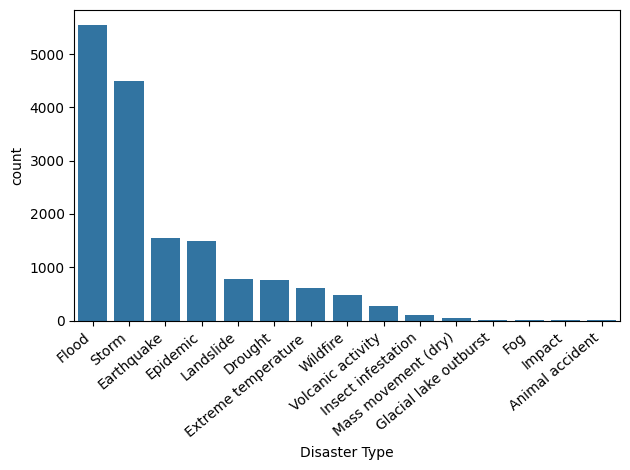

In [11]:
#countplot-count disaster types+years
disaster_type_countplot = sns.countplot(data=final_df, x = "Disaster Type", order=final_df['Disaster Type'].value_counts().index)
disaster_type_countplot.set_xticklabels(disaster_type_countplot.get_xticklabels(), rotation=40,ha="right")
plt.tight_layout()
plt.show()
#sns.histplot(data=final_df, binwidth = 1, x = "Start Year")
plt.show()

Klaudia's suggestion: I find it easier to plot in matplotlib

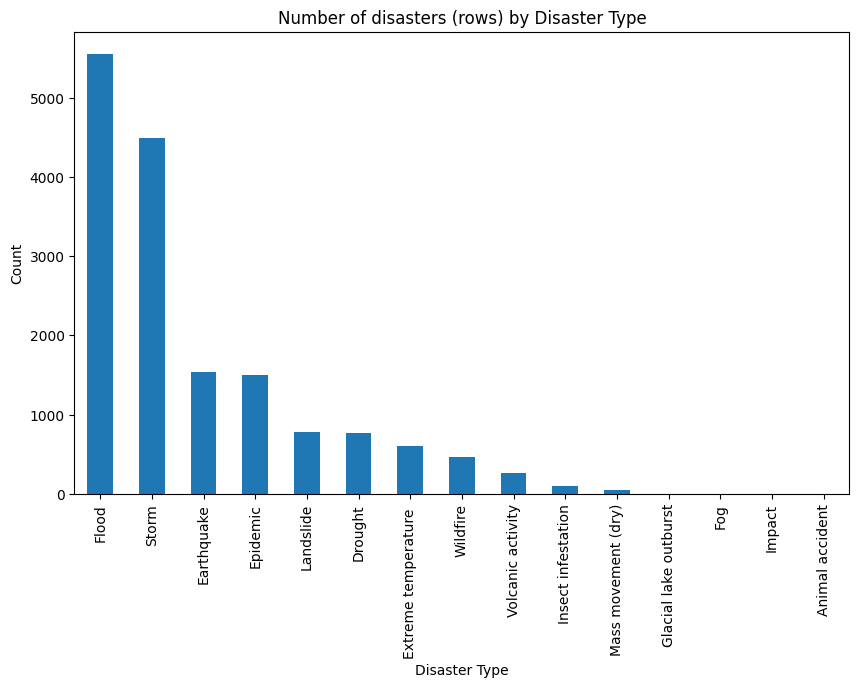

In [14]:
disaster_counts = final_df['Disaster Type'].value_counts()
sorted_disaster_counts = disaster_counts.sort_values(ascending=False)

# Create the plot
plt.figure(figsize=(10,6))
sorted_disaster_counts.plot(kind='bar')
plt.title('Number of disasters (rows) by Disaster Type')
plt.xlabel('Disaster Type')
plt.ylabel('Count')
plt.show()

C:\Users\LE12AE\AppData\Local\Temp\ipykernel_8688\3746168727.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  region_countplot.set_xticklabels(region_countplot.get_xticklabels(), rotation=40,ha="right")


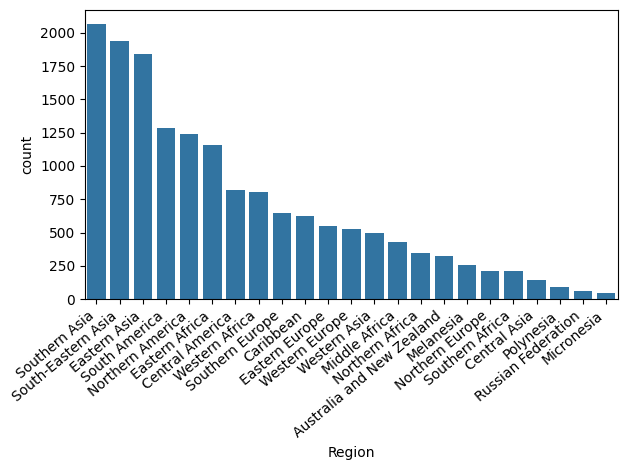

In [15]:
#regions-count
region_countplot = sns.countplot(data=final_df, x = "Region", order=final_df['Region'].value_counts().index)
region_countplot.set_xticklabels(region_countplot.get_xticklabels(), rotation=40,ha="right")
plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_12836\2923668892.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  scatter1.set_xticklabels(scatter1.get_xticklabels(), rotation=40,ha="right")


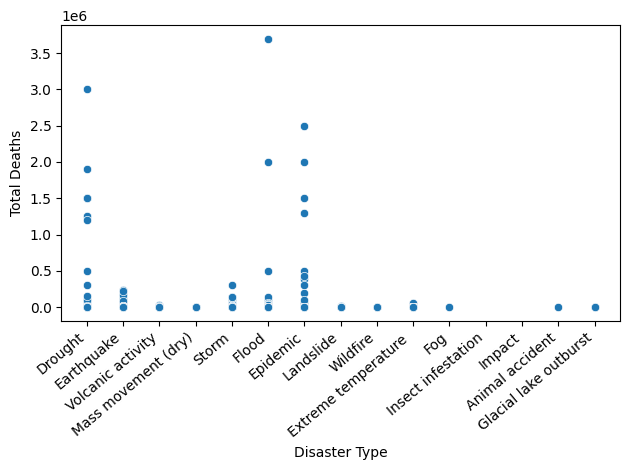

In [32]:
#liczba smierci
scatter1 = sns.scatterplot(data=final_df, x = "Disaster Type", y = "Total Deaths")
scatter1.set_xticklabels(scatter1.get_xticklabels(), rotation=40,ha="right")
plt.tight_layout()
plt.show()

#podsumować liczbę śmierci (groupby; sum) dla konkretnych katastrof i zrobić barplot

In [33]:
final_df_grouped = final_df.groupby("Start Year").count()
final_df_grouped.info()

final_df_grouped = final_df_grouped[["Disaster Type"]]
print(final_df_grouped)

final_df_grouped = final_df_grouped.reset_index()
print(final_df_grouped)
#final_df_grouped.head()


<class 'pandas.core.frame.DataFrame'>
Index: 122 entries, 1900 to 2021
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Disaster Subgroup  122 non-null    int64
 1   Disaster Type      122 non-null    int64
 2   Disaster Subtype   122 non-null    int64
 3   Country            122 non-null    int64
 4   ISO                122 non-null    int64
 5   Region             122 non-null    int64
 6   Continent          122 non-null    int64
 7   Total Deaths       122 non-null    int64
dtypes: int64(8)
memory usage: 8.6 KB
            Disaster Type
Start Year               
1900                    7
1901                    2
1902                   10
1903                   12
1904                    4
...                   ...
2017                  371
2018                  336
2019                  438
2020                  403
2021                  317

[122 rows x 1 columns]
     Start Year  Disaster Type
0     

In [34]:
final_df_grouped["Start Year"] = pd.to_datetime(final_df_grouped["Start Year"])

# Set date column as index
final_df_grouped.set_index("Start Year", inplace=True)

# Inspect data 
print(final_df_grouped.info())
#print (final_df_grouped.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 122 entries, 1970-01-01 00:00:00.000001900 to 1970-01-01 00:00:00.000002021
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Disaster Type  122 non-null    int64
dtypes: int64(1)
memory usage: 1.9 KB
None


NOWE 

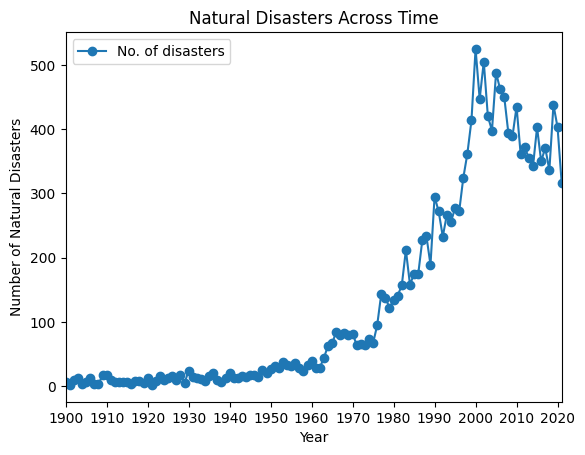

In [43]:
#uzupelnione

# Plot data
final_df_grouped.plot(marker = "o")

plt.xticks(final_df_grouped.index)
plt.xlabel('Year')
plt.ylabel('Number of Natural Disasters')
plt.title('Natural Disasters Across Time')
plt.legend(["No. of disasters"])

years_to_show = range(1900, 2021, 10)
plt.xticks(years_to_show, labels=[str(year) for year in years_to_show])
plt.show()

#dodac horizontal index (rok)
# [done] zmienic nazwe kolumny na Numbers of Disasters albo Frequency
# [done] dodać tytuł plot tlt.
#zrobić coś podobnego, ale dodając kolumnę Continents (i może groupby na kontynent)

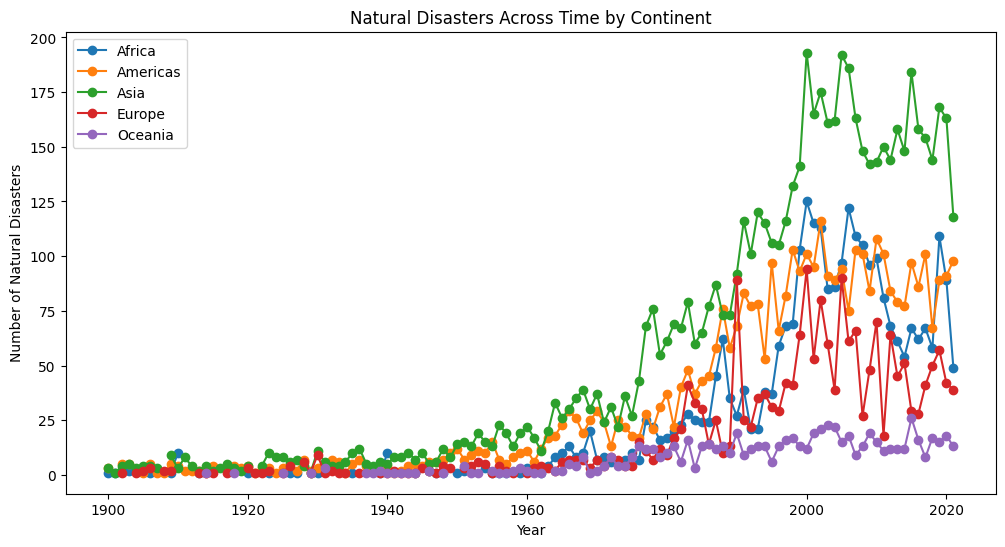

In [36]:
# Group by Start Year and Continent, count the number of disasters
lineplot_df = final_df.groupby(['Start Year', 'Continent']).size().reset_index(name='Number of Disasters')

# Pivot the DataFrame to have continents as separate columns
pivot_df = lineplot_df.pivot(index='Start Year', columns='Continent', values='Number of Disasters')

# Plot the lines for each continent
plt.figure(figsize=(12, 6))
for continent in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[continent], label=continent, marker = "o")

# labels and title
plt.xlabel('Year')
plt.ylabel('Number of Natural Disasters')
plt.title('Natural Disasters Across Time by Continent')


plt.legend()
plt.show()

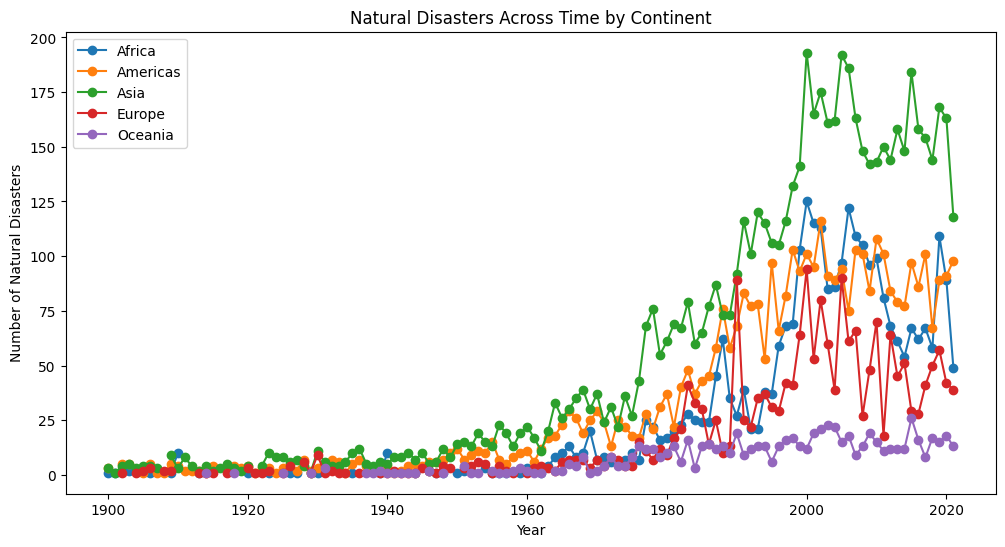

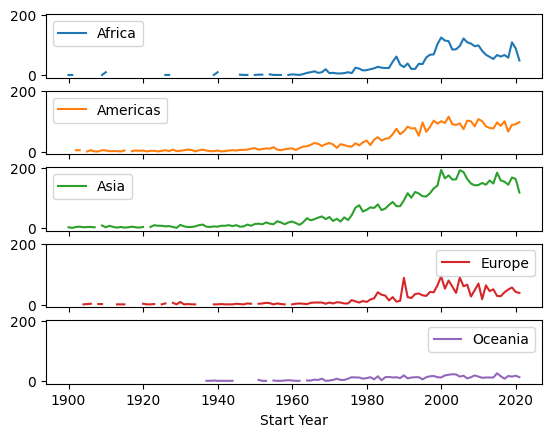

In [53]:
# Group by Start Year and Continent, count the number of disasters
lineplot_df = final_df.groupby(['Start Year', 'Continent']).size().reset_index(name='Number of Disasters')

# Pivot the DataFrame to have continents as separate columns
pivot_df = lineplot_df.pivot(index='Start Year', columns='Continent', values='Number of Disasters')

# Plot the lines for each continent
plt.figure(figsize=(12, 6))
for continent in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[continent], label=continent, marker = "o")

# labels and title
plt.xlabel('Year')
plt.ylabel('Number of Natural Disasters')
plt.title('Natural Disasters Across Time by Continent')


plt.legend()
pivot_df.plot(subplots=True, sharey=True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


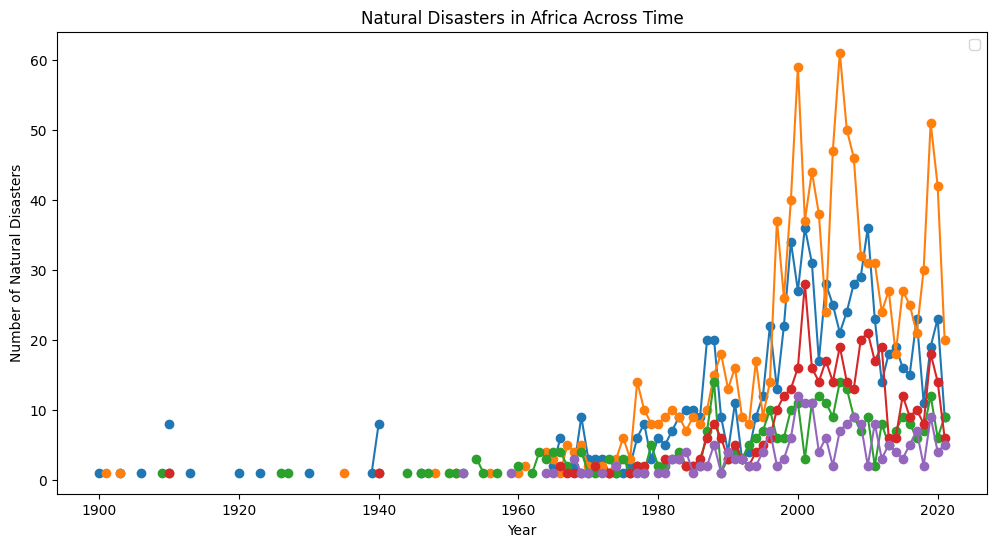

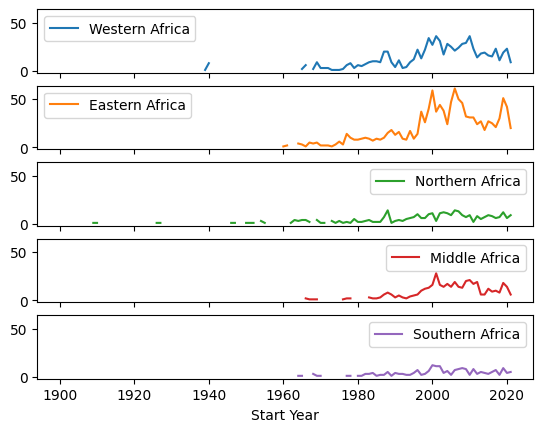

In [82]:
# Group by Start Year and Continent, count the number of disasters
lineplot_df = final_df.groupby(['Start Year', 'Continent','Region']).size().reset_index(name='Number of Disasters')

# Pivot the DataFrame to have continents as separate columns
pivot_df = lineplot_df.pivot(index='Start Year', columns=['Continent','Region'], values='Number of Disasters')

# Plot the lines for each continent
plt.figure(figsize=(12, 6))
africa = 'Africa'

plt.plot(pivot_df.index, pivot_df[africa], marker = "o")


# labels and title
plt.xlabel('Year')
plt.ylabel('Number of Natural Disasters')
plt.title('Natural Disasters in Africa Across Time')


plt.legend()
pivot_df[africa].plot(subplots=True, sharey=True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


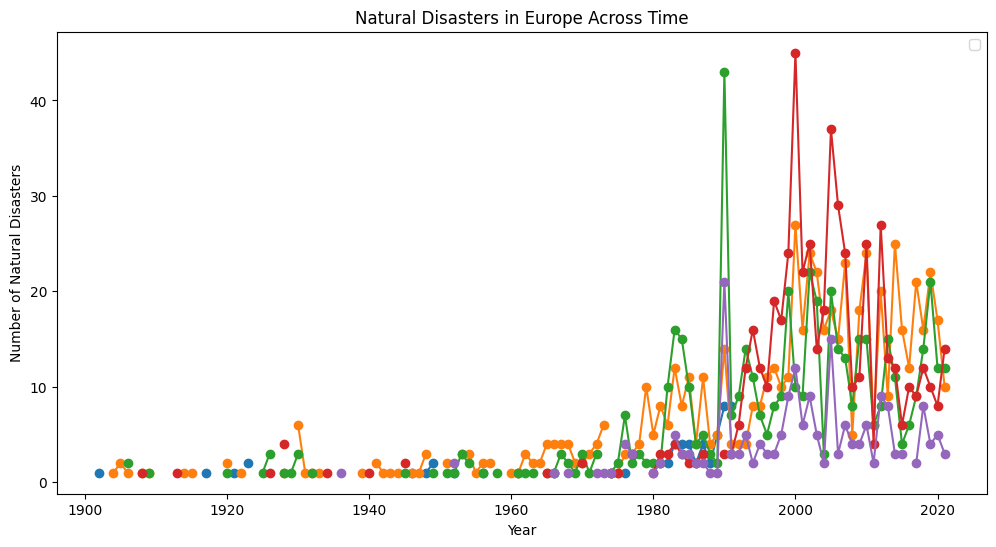

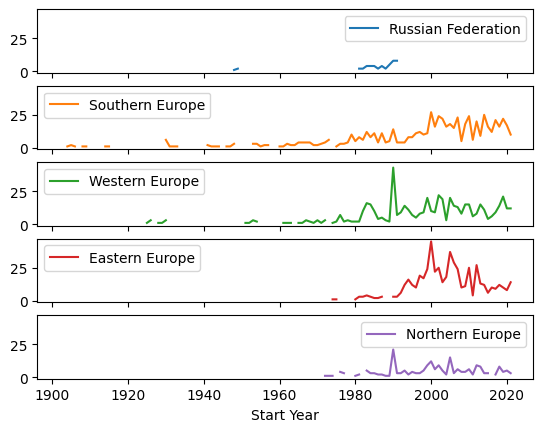

In [92]:
# Group by Start Year and Continent, count the number of disasters
lineplot_df = final_df.groupby(['Start Year', 'Continent','Region']).size().reset_index(name='Number of Disasters')

# Pivot the DataFrame to have continents as separate columns
pivot_df = lineplot_df.pivot(index='Start Year', columns=['Continent','Region'], values='Number of Disasters')

# Plot the lines for each continent
plt.figure(figsize=(12, 6))
continent = 'Europe'

plt.plot(pivot_df.index, pivot_df[continent], marker = "o")


# labels and title
plt.xlabel('Year')
plt.ylabel('Number of Natural Disasters')
plt.title('Natural Disasters in Europe Across Time')


plt.legend()
pivot_df[continent].plot(subplots=True, sharey=True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


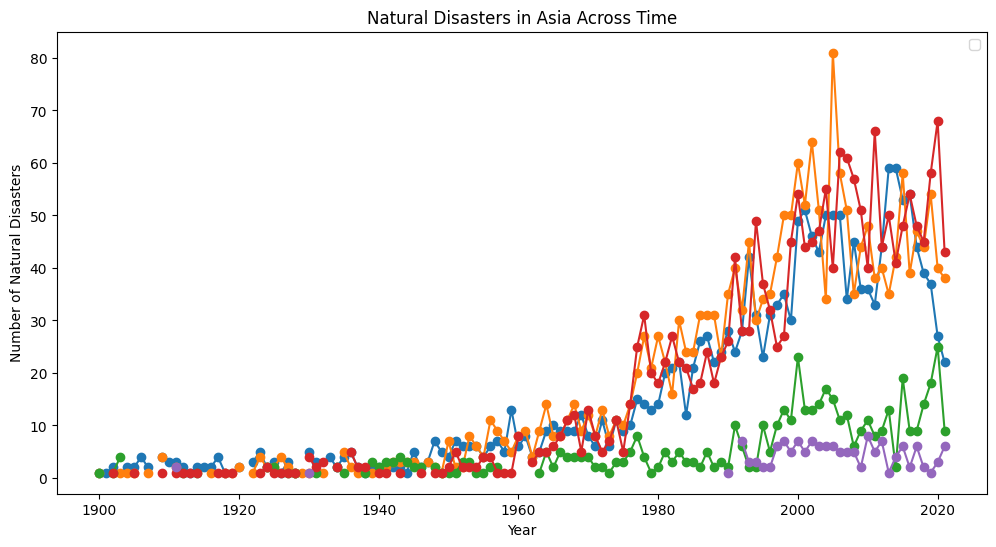

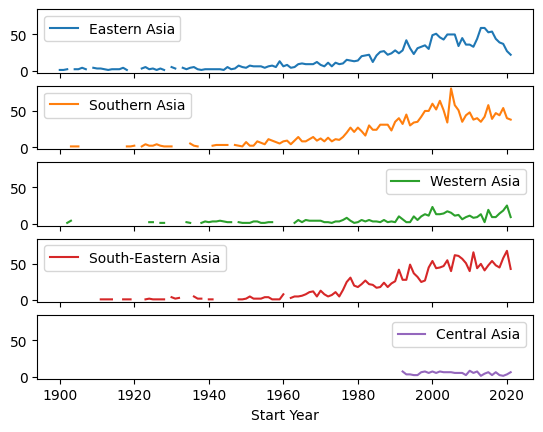

In [93]:
# Group by Start Year and Continent, count the number of disasters
lineplot_df = final_df.groupby(['Start Year', 'Continent','Region']).size().reset_index(name='Number of Disasters')

# Pivot the DataFrame to have continents as separate columns
pivot_df = lineplot_df.pivot(index='Start Year', columns=['Continent','Region'], values='Number of Disasters')

# Plot the lines for each continent
plt.figure(figsize=(12, 6))
continent = 'Asia'

plt.plot(pivot_df.index, pivot_df[continent], marker = "o")


# labels and title
plt.xlabel('Year')
plt.ylabel('Number of Natural Disasters')
plt.title('Natural Disasters in Asia Across Time')


plt.legend()
pivot_df[continent].plot(subplots=True, sharey=True)
plt.show()

In [ ]:
#test git